1-classification report
2- feature scaling

In [ ]:
# classification problem 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 
#importing the dataset 
dataset = pd.read_csv('breastCancer.csv')
dataset=dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

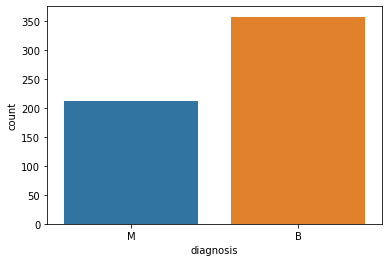

In [8]:
import seaborn as sns
sns.countplot(x=dataset["diagnosis"]);

In [9]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [10]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_train_s=minmax.fit_transform(x_train)
x_test_s=minmax.fit_transform(X_test)

In [15]:
pd.DataFrame(x_test_s)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.368783,0.7275,0.367657,0.230073,0.553036,0.487059,0.462999,0.457449,0.518651,0.316844,...,0.414799,0.796791,0.472349,0.254533,0.565411,0.625600,0.505990,0.734398,0.476334,0.360276
1,0.214624,0.5750,0.198907,0.113447,0.461819,0.240181,0.147730,0.147517,0.249641,0.363966,...,0.166543,0.528409,0.151616,0.075720,0.425006,0.193591,0.134824,0.297315,0.123546,0.291857
2,0.327118,0.0085,0.306892,0.190153,0.577795,0.270588,0.243246,0.302039,0.468436,0.287420,...,0.245213,0.103944,0.231566,0.123795,0.321744,0.130599,0.204473,0.443033,0.248095,0.199138
3,0.264622,0.5425,0.239243,0.148970,0.261402,0.103457,0.091994,0.126712,0.439024,0.136887,...,0.189550,0.545789,0.180510,0.092753,0.193225,0.116741,0.096805,0.203701,0.197553,0.082981
4,0.135462,0.6745,0.116890,0.068652,0.210581,0.111747,0.042586,0.042656,0.554519,0.271642,...,0.146133,0.620989,0.133699,0.063883,0.240770,0.112847,0.049473,0.118433,0.282190,0.166394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.359929,0.9545,0.325077,0.224457,0.227261,0.039457,0.128913,0.143178,0.465567,0.051173,...,0.303102,0.803476,0.269366,0.170221,0.199168,0.038814,0.123562,0.238570,0.317088,0.040500
110,0.162544,0.3945,0.145850,0.081538,0.510034,0.180416,0.118349,0.135599,0.519369,0.246695,...,0.125353,0.339572,0.109103,0.057140,0.448035,0.106090,0.129712,0.309942,0.282391,0.093753
111,0.525546,0.3930,0.488887,0.364416,0.262184,0.179294,0.224732,0.303921,0.299857,0.079104,...,0.453392,0.450869,0.420050,0.289746,0.263056,0.205846,0.282588,0.570029,0.311673,0.107109
112,0.166710,0.4830,0.181920,0.079317,1.000000,0.900452,0.664099,0.549922,1.000000,1.000000,...,0.215897,0.455548,0.211216,0.079392,0.904910,0.917996,0.548642,0.934325,1.000000,1.000000


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model=SVC()
model.fit(x_train_s,y_train)

SVC()

In [17]:
y_pred=model.predict(x_test_s)
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

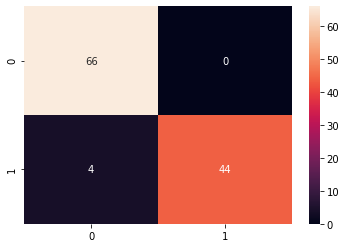

In [18]:
sns.heatmap(cm,annot=True)

In [23]:
macro_avg=(0.5)*(0.94)+(0.5)*(0.5)
macro_avg

0.72

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.94      1.00      0.97        66
           M       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [37]:
min_train=x_train.min()
min_train

0.0

<AxesSubplot:ylabel='Density'>

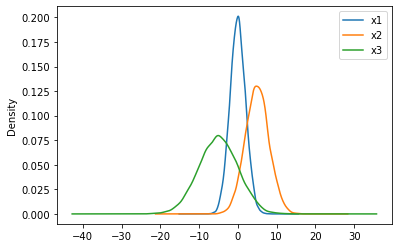

In [39]:
df=pd.DataFrame({
    'x1':np.random.normal(0,2,10000),
    'x2':np.random.normal(5,3,10000),
    'x3':np.random.normal(-5,5,10000),
})

df.plot.kde()

<AxesSubplot:ylabel='Density'>

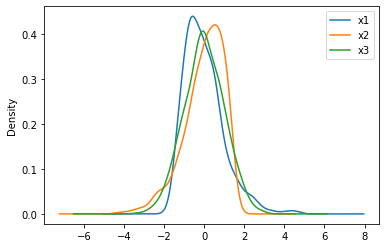

In [43]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd=StandardScaler()
data_tf=sd.fit_transform(df)
df=pd.DataFrame(data_tf,columns=["x1","x2","x3"])
df.plot.kde()

<AxesSubplot:ylabel='Density'>

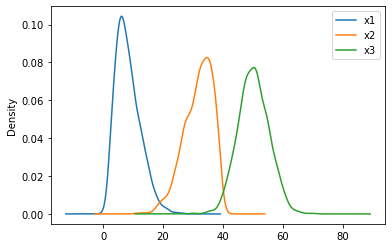

In [44]:
df=pd.DataFrame({
    'x1':np.random.chisquare(8,1000),
    'x2':np.random.beta(8,2,1000)*40,
    'x3':np.random.normal(50,5,1000),
})

df.plot.kde()

<AxesSubplot:ylabel='Density'>

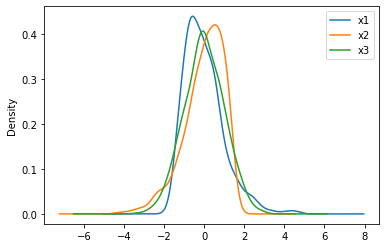

In [42]:
sd=StandardScaler()
data_tf=sd.fit_transform(df)
df=pd.DataFrame(data_tf,columns=["x1","x2","x3"])
df.plot.kde()

<AxesSubplot:ylabel='Density'>

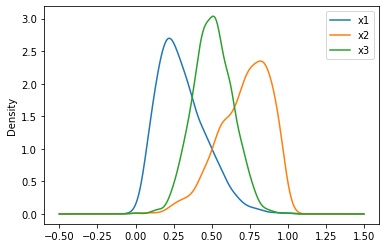

In [45]:
minmax=MinMaxScaler()
data_tf=minmax.fit_transform(df)
df=pd.DataFrame(data_tf,columns=["x1","x2","x3"])
df.plot.kde()

<AxesSubplot:ylabel='Density'>

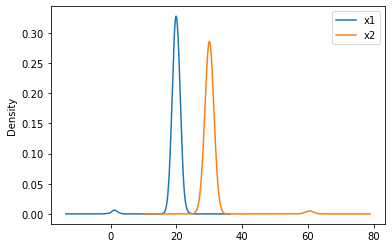

In [57]:
from sklearn.preprocessing import RobustScaler
df=pd.DataFrame({
    'x1':np.concatenate([np.random.normal(20,1,1000),np.random.normal(1,1,15)]),
    'x2':np.concatenate([np.random.normal(30,1,1000),np.random.normal(60,1,15)])
    })

df.plot.kde()

<AxesSubplot:ylabel='Density'>

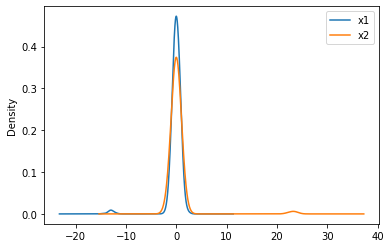

In [59]:
rb=RobustScaler()
data_tf=rb.fit_transform(df)
df=pd.DataFrame(data_tf,columns=["x1","x2"])
df.plot.kde()

In [76]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
df=pd.DataFrame({
    "age":[33,31,34,65,32,2],
    "gender":["M","M","M","F","M","F"]
    
})

In [68]:
le=LabelEncoder()
df["gender_tf"]=le.fit_transform(df.gender)
df

,age,gender,gender_tf
0,33,M,1
1,31,M,1
2,34,M,1
3,65,F,0
4,32,M,1
5,2,F,0


In [73]:
OneHotEncoder().fit_transform(df[["gender_tf"]]).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [81]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
df=pd.DataFrame({
    "X":[1,2,3,4,np.nan,np.nan],
    "y":[3,4,1,np.nan,5,np.nan]
    
})
imputer.fit_transform(df)

array([[1.  , 3.  ],
       [2.  , 4.  ],
       [3.  , 1.  ],
       [4.  , 3.25],
       [2.5 , 5.  ],
       [2.5 , 3.25]])